<html>
    <body>
        <p style="font-size:22px;text-align:center;"><b>Practical:4 </b></p>
        <p style="font-size:20px;text-align:center;">KHARE PRATYUSH</p>
        <p style="font-size:20px;text-align:center;">Roll-No: 20BCE519</p>
        <p style="font-size:20px;text-align:center;">Course: Machine Learning(2CS501)</p>
    </body>
</html>

<p style="font-size: 1em"><b> Gradient Descent Approach Using Regularization</b></p>

In [1]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler

# Datasets
X, y = datasets.load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

# Training Datasets
X_train_temp1=X[0:400,:]
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1
print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape)
y_train=y[0:400]

# Testing DataSets
X_test_temp1=X[400:506,:]
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1
print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape)
y_test=y[400:506]

# Normalizing Data
scaler=StandardScaler()
scaler.fit(X_train[:,1:])
X_train[:,1:]=scaler.transform(X_train[:,1:])
X_test[:,1:]=scaler.transform(X_test[:,1:])

(506, 13)
(506,)
Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 14)
Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 14)


In [2]:
# cost function
cf=[]
ypred_list=[]

alpha_list=[0.01,0.001,0.0001,0.00001]
niterations_list=[500,1000]

lambda1=10

for a in range(len(alpha_list)):
    alpha=alpha_list[a]
    for k in range(len(niterations_list)):
        niterations=niterations_list[k]
        
        theta=np.random.uniform(0,1,size=(X_train.shape[1]))
        m=X_train.shape[0]
        n=X_train.shape[1]
        cost_list=[]
        
        for i in range(niterations):
            update=np.zeros(X_train.shape[1])
            ypred=np.dot(X_train,theta)
            error=ypred-y_train
            cost=1/(2*m) * (np.dot(error.T, error) + (lambda1 * np.dot(theta.T,theta)))
            cost_list.append(cost)
            for j in range(n):
                update[j]=np.sum(error*(X_train.T)[j])
            
            theta=theta*(1-((lambda1/m)*alpha))-(1/m)*alpha*update
        
        ypred=np.dot(X_test,theta)
        ypred_list.append(ypred)
        cf.append(cost_list)

# Alpha 0.01
print("\t\t\t -----Parameters for Alpha 0.01-----")
print("For 500 iterations\n")
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_true=y_test,y_pred=ypred_list[0]))
print("Mean Squared Error: ",metrics.mean_squared_error(y_true=y_test,y_pred=ypred_list[0]))

print("\nFor 1000 iterations\n")
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_true=y_test,y_pred=ypred_list[1]))
print("Mean Squared Error: ",metrics.mean_squared_error(y_true=y_test,y_pred=ypred_list[1]))

# Alpha 0.001
print("\n\t\t\t -----Parameters for Alpha 0.001-----")
print("For 500 iterations\n")
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_true=y_test,y_pred=ypred_list[2]))
print("Mean Squared Error: ",metrics.mean_squared_error(y_true=y_test,y_pred=ypred_list[2]))

print("\nFor 1000 iterations\n")
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_true=y_test,y_pred=ypred_list[3]))
print("Mean Squared Error: ",metrics.mean_squared_error(y_true=y_test,y_pred=ypred_list[3]))

			 -----Parameters for Alpha 0.01-----
For 500 iterations

Mean Absolute Error:  4.103636324928238
Mean Squared Error:  25.462176708537346

For 1000 iterations

Mean Absolute Error:  4.364320545301086
Mean Squared Error:  28.357122274713724

			 -----Parameters for Alpha 0.001-----
For 500 iterations

Mean Absolute Error:  12.814474680000288
Mean Squared Error:  181.6336080250059

For 1000 iterations

Mean Absolute Error:  6.950904632492186
Mean Squared Error:  64.3892253973047


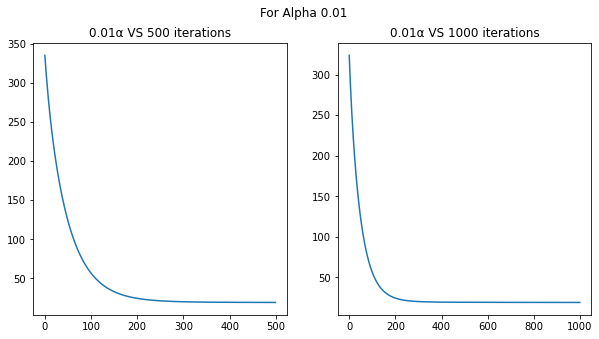

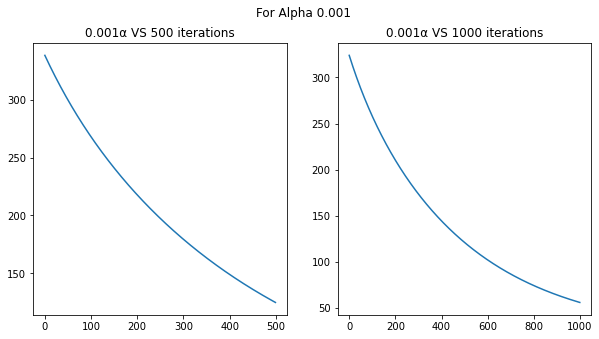

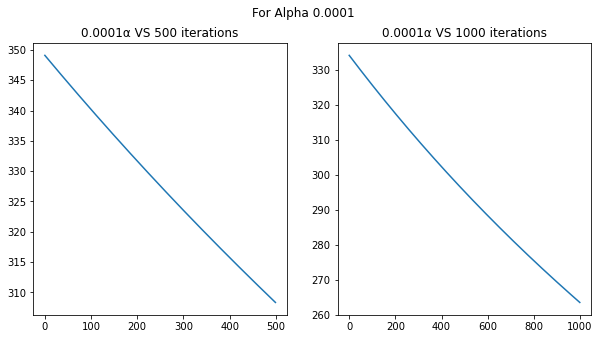

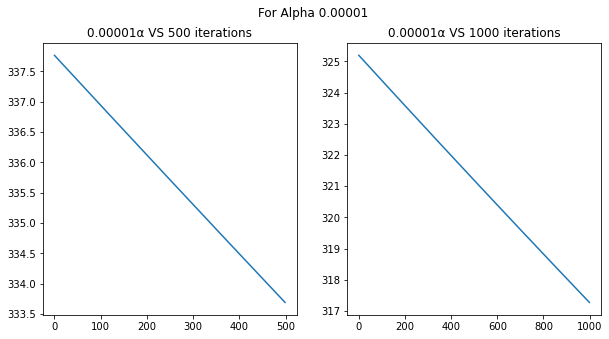

In [4]:
#Plotting

import matplotlib.pyplot as plt

# Alpha 0.01
figure, axis = plt.subplots(1,2)
figure.suptitle('For Alpha 0.01\n')

axis[0].plot(cf[0])
axis[0].set_title("0.01α VS 500 iterations")

axis[1].plot(cf[1])
axis[1].set_title("0.01α VS 1000 iterations")
  
figure.set_figwidth(10)
figure.set_figheight(5)

#Alpha 0.001
figure, axis = plt.subplots(1,2)
figure.suptitle('For Alpha 0.001\n')

axis[0].plot(cf[2])
axis[0].set_title("0.001α VS 500 iterations")
  
axis[1].plot(cf[3])
axis[1].set_title("0.001α VS 1000 iterations")
  
figure.set_figwidth(10)
figure.set_figheight(5)

#Alpha 0.0001
figure, axis = plt.subplots(1,2)
figure.suptitle('For Alpha 0.0001\n')

axis[0].plot(cf[4])
axis[0].set_title("0.0001α VS 500 iterations")
  
axis[1].plot(cf[5])
axis[1].set_title("0.0001α VS 1000 iterations")
  
figure.set_figwidth(10)
figure.set_figheight(5)

#Alpha 0.00001
figure, axis = plt.subplots(1,2)
figure.suptitle('For Alpha 0.00001\n')

axis[0].plot(cf[6])
axis[0].set_title("0.00001α VS 500 iterations")
  
axis[1].plot(cf[7])
axis[1].set_title("0.00001α VS 1000 iterations")
  
figure.set_figwidth(10)
figure.set_figheight(5)
